# Data Exploration of the chips category

In [1]:
#import modules into notebook
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

In [2]:
#import files into pandas 
excel_path = 'QVI_transaction_data.xlsx'
transact = pd.read_excel(excel_path)
transact

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
#import purchasing habits 
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## 1. Examination of transaction data 

In [4]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
#inspect missing data 
transact.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
#inspect the product names 
transact.PROD_NAME.nunique()

114

The product name is a string that consists of numeric data such as the weight.

In [7]:
#split the product name and product weight 
import re

def clean_string(input_string):
    # Use regular expression to find the numeric part followed by 'g'
    match = re.search(r'(\d+)g$', input_string)

    if match:
        # Extract the numeric part
        numeric_part = match.group(1)

        # Remove the numeric part and trailing 'g' from the input string
        cleaned_string = re.sub(r'\d+g$', '', input_string).strip()

        return cleaned_string, int(numeric_part)
    else:
        # Return the original string if no match is found
        return input_string, None

# Example usage:
input_string = "Natural Chip Compny SeaSalt175g"
cleaned_string, numeric_part = clean_string(input_string)

print("Original String:", input_string)
print("Cleaned String:", cleaned_string)
print("Numeric Part:", numeric_part)


Original String: Natural Chip Compny SeaSalt175g
Cleaned String: Natural Chip Compny SeaSalt
Numeric Part: 175


In [8]:
import pandas as pd
import re

# Sample DataFrame
data = {'Product_Name': ["Natural Chip Compny SeaSalt175g", "Another Product250g", "YetAnother300g"]}
df = pd.DataFrame(data)

def clean_string(input_string):
    match = re.search(r'(\d+)g$', input_string)
    if match:
        numeric_part = match.group(1)
        cleaned_string = re.sub(r'\d+g$', '', input_string).strip()
        return cleaned_string, int(numeric_part)
    else:
        return input_string, None

# Apply the cleaning function to each row in the 'Product_Name' column
df[['Cleaned_String', 'Numeric_Part']] = df['Product_Name'].apply(lambda x: pd.Series(clean_string(x)))

# Display the DataFrame
print(df)


                      Product_Name               Cleaned_String  Numeric_Part
0  Natural Chip Compny SeaSalt175g  Natural Chip Compny SeaSalt           175
1              Another Product250g              Another Product           250
2                   YetAnother300g                   YetAnother           300


In [9]:
#use the function for PROD_NAME
transact[['PRODUCT','WEIGHT']] = transact['PROD_NAME'].apply(lambda x: pd.Series(clean_string(x)))

In [10]:
transact.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175.0
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170.0
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly S/Cream&Onion,175.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150.0


In [11]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   PRODUCT         264836 non-null  object 
 9   WEIGHT          255515 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 20.2+ MB


<AxesSubplot:>

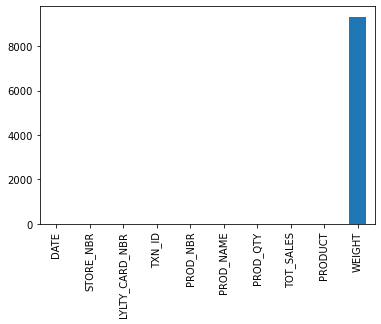

In [12]:
transact.isna().sum().plot(kind='bar')

In [13]:
#inspecting the product names of the fields with missing weight 
missing = transact.loc[transact['WEIGHT'].isna()]
missing

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain Waves Sour Cream&Chives 210G,NaN
34,43328,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red Rock Deli Sp Salt & Truffle 150G,NaN
35,43331,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,Smiths Thinly Swt Chli&S/Cream175G,NaN
65,43605,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle 135g Swt Pot Sea Salt,NaN
153,43602,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle 135g Swt Pot Sea Salt,NaN
...,...,...,...,...,...,...,...,...,...,...
264725,43301,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle 135g Swt Pot Sea Salt,NaN
264733,43596,266,266432,264264,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red Rock Deli Sp Salt & Truffle 150G,NaN
264745,43284,268,268200,264615,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain Waves Sour Cream&Chives 210G,NaN
264767,43624,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle 135g Swt Pot Sea Salt,NaN


## 2. Data preprocessing 

In [14]:

def clean_and_extract_numeric(input_string):
    # Remove numeric data and its trailing 'G' or 'g'
    cleaned_string = re.sub(r'\d+[Gg]', '', input_string).strip()
    
    # Extract numeric part
    numeric_part_match = re.search(r'(\d+)[Gg]', input_string)
    numeric_part = int(numeric_part_match.group(1)) if numeric_part_match else None
    
    return cleaned_string, numeric_part

# Example usage
input_text = 'Kettle 135g Swt Pot Sea Salt'
cleaned_result, numeric_part_result = clean_and_extract_numeric(input_text)
print("Cleaned String:", cleaned_result)
print("Numeric Part:", numeric_part_result)


Cleaned String: Kettle  Swt Pot Sea Salt
Numeric Part: 135


In [15]:
#use the function for PROD_NAME
missing[['PRODUCT','WEIGHT']] = missing['PROD_NAME'].apply(lambda x: pd.Series(clean_and_extract_numeric(x)))

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/1849289386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[['PRODUCT','WEIGHT']] = missing['PROD_NAME'].apply(lambda x: pd.Series(clean_and_extract_numeric(x)))


In [16]:
missing

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain Waves Sour Cream&Chives,210
34,43328,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red Rock Deli Sp Salt & Truffle,150
35,43331,51,51100,46803,37,Smiths Thinly Swt Chli&S/Cream175G,1,3.0,Smiths Thinly Swt Chli&S/Cream,175
65,43605,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle Swt Pot Sea Salt,135
153,43602,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle Swt Pot Sea Salt,135
...,...,...,...,...,...,...,...,...,...,...
264725,43301,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle Swt Pot Sea Salt,135
264733,43596,266,266432,264264,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red Rock Deli Sp Salt & Truffle,150
264745,43284,268,268200,264615,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain Waves Sour Cream&Chives,210
264767,43624,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle Swt Pot Sea Salt,135


In [17]:
missing.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PRODUCT           0
WEIGHT            0
dtype: int64

In [18]:
#updating the missing values in transact 
transact.update(missing)
transact

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,43390.0,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,Natural Chip Compny SeaSalt,175.0
1,43599.0,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,CCs Nacho Cheese,175.0
2,43605.0,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,Smiths Crinkle Cut Chips Chicken,170.0
3,43329.0,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,Smiths Chip Thinly S/Cream&Onion,175.0
4,43330.0,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150.0
...,...,...,...,...,...,...,...,...,...,...
264831,43533.0,272.0,272319.0,270088.0,89.0,Kettle Sweet Chilli And Sour Cream 175g,2.0,10.8,Kettle Sweet Chilli And Sour Cream,175.0
264832,43325.0,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime 175g,1.0,4.4,Tostitos Splash Of Lime,175.0
264833,43410.0,272.0,272379.0,270187.0,51.0,Doritos Mexicana 170g,2.0,8.8,Doritos Mexicana,170.0
264834,43461.0,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8,Doritos Corn Chip Mexican Jalapeno,150.0


In [19]:
transact.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PRODUCT           0
WEIGHT            0
dtype: int64

In [20]:
transact.drop(columns ='PROD_NAME',inplace=True)


In [21]:
#identify unique products 
#convert text to lower case for consistency 
#remove special characters for consistency 
transact['PRODUCT'] = transact['PRODUCT'].str.replace('\W',' ',regex=True)
transact


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,Natural Chip Compny SeaSalt,175.0
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,CCs Nacho Cheese,175.0
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,Smiths Crinkle Cut Chips Chicken,170.0
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,Smiths Chip Thinly S Cream Onion,175.0
4,43330.0,2.0,2426.0,1038.0,108.0,3.0,13.8,Kettle Tortilla ChpsHny Jlpno Chili,150.0
...,...,...,...,...,...,...,...,...,...
264831,43533.0,272.0,272319.0,270088.0,89.0,2.0,10.8,Kettle Sweet Chilli And Sour Cream,175.0
264832,43325.0,272.0,272358.0,270154.0,74.0,1.0,4.4,Tostitos Splash Of Lime,175.0
264833,43410.0,272.0,272379.0,270187.0,51.0,2.0,8.8,Doritos Mexicana,170.0
264834,43461.0,272.0,272379.0,270188.0,42.0,2.0,7.8,Doritos Corn Chip Mexican Jalapeno,150.0


In [22]:
transact['PRODUCT'] = transact['PRODUCT'].str.lower()


In [23]:
transact['PRODUCT'] = transact['PRODUCT'].str.replace(r'\s+', ' ').str.strip()


/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/1426358303.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transact['PRODUCT'] = transact['PRODUCT'].str.replace(r'\s+', ' ').str.strip()


In [24]:
transact['PRODUCT'].unique()

array(['natural chip compny seasalt', 'ccs nacho cheese',
       'smiths crinkle cut chips chicken',
       'smiths chip thinly s cream onion',
       'kettle tortilla chpshny jlpno chili',
       'old el paso salsa dip tomato mild',
       'smiths crinkle chips salt vinegar', 'grain waves sweet chilli',
       'doritos corn chip mexican jalapeno',
       'grain waves sour cream chives', 'kettle sensations siracha lime',
       'twisties cheese', 'ww crinkle cut chicken',
       'thins chips light tangy', 'ccs original', 'burger rings',
       'ncc sour cream garden chives',
       'doritos corn chip southern chicken', 'cheezels cheese box',
       'smiths crinkle original', 'infzns crn crnchers tangy gcamole',
       'kettle sea salt and vinegar', 'smiths chip thinly cut original',
       'kettle original', 'red rock deli thai chilli lime',
       'pringles sthrn friedchicken', 'pringles sweet spcy bbq',
       'red rock deli sr salsa mzzrlla', 'thins chips originl saltd',
       'red

In [25]:
#identifying brand names 
brands = transact['PRODUCT'].str.split().str.get(0)
brands.value_counts()

kettle        41288
smiths        28860
pringles      25102
doritos       24962
thins         14075
rrd           11894
infuzions     11057
ww            10320
cobs           9693
tostitos       9471
twisties       9454
old            9324
tyrrells       6442
grain          6272
natural        6050
red            5885
cheezels       4603
ccs            4551
woolworths     4437
dorito         3185
infzns         3144
smith          2963
cheetos        2927
snbts          1576
burger         1564
grnwves        1468
sunbites       1432
ncc            1419
french         1418
Name: PRODUCT, dtype: int64

In [26]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [27]:
from fuzzywuzzy import fuzz

# Create a sample DataFrame
data = {'Product_Name': ['natural chip compny seasalt', 'natural chipco sea salt vinegr']}
df = pd.DataFrame(data)

# Function to find similar strings
def find_similar_strings(target, string_list, threshold=80):
    return [s for s in string_list if fuzz.token_sort_ratio(target, s) > threshold]

# Example usage
target_string = 'natural chip compny sea salt'
similar_strings = find_similar_strings(target_string, df['Product_Name'])

# Replace similar strings with the correct one
df['Product_Name'].replace(similar_strings, target_string, inplace=True)

# Display the modified DataFrame
print(df)


                     Product_Name
0    natural chip compny sea salt
1  natural chipco sea salt vinegr


/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [28]:


# Create a sample DataFrame
data = {'Product_Name': ['natural chip compny seasalt', 'natural chipco sea salt vinegr', 'organic chips sea salt']}
df = pd.DataFrame(data)

# Function to identify and replace similar strings
def reduce_duplicates(df, column_name, threshold=80):
    unique_strings = df[column_name].unique()

    for target_string in unique_strings:
        similar_strings = [s for s in unique_strings if fuzz.token_sort_ratio(target_string, s) > threshold]
        
        if len(similar_strings) > 1:
            # Replace similar strings with the correct one
            df[column_name].replace(similar_strings, target_string, inplace=True)

    return df

# Apply the function to the DataFrame
df = reduce_duplicates(df, 'Product_Name')

# Display the modified DataFrame
print(df)


                     Product_Name
0     natural chip compny seasalt
1  natural chipco sea salt vinegr
2          organic chips sea salt


In [29]:
prod_name_summary = transact['PRODUCT'].describe()

In [30]:
del prod_name_summary

In [31]:
product_words = pd.Series(' '.join(transact['PRODUCT'].dropna()).split())

# Display the summary of words in 'PROD_NAME'
word_counts = product_words.value_counts().reset_index()
word_counts.columns = ['words', 'count']
print(word_counts)

        words  count
0       chips  49770
1      kettle  41288
2      smiths  28860
3        salt  27976
4      cheese  27890
..        ...    ...
192  sunbites   1432
193        pc   1431
194       ncc   1419
195    garden   1419
196     fries   1418

[197 rows x 2 columns]


In [32]:
transact.loc[transact['PRODUCT'].str.contains('chips', case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0
6,43601.0,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
10,43602.0,7.0,7215.0,7176.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
14,43600.0,19.0,19272.0,16686.0,44.0,1.0,3.3,thins chips light tangy,175.0
33,43603.0,45.0,45220.0,41651.0,22.0,1.0,3.3,thins chips originl saltd,175.0
...,...,...,...,...,...,...,...,...,...
264809,43336.0,271.0,271051.0,268506.0,47.0,2.0,8.8,doritos corn chips original,170.0
264815,43408.0,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0
264816,43614.0,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
264826,43549.0,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0


In [33]:
transact.loc[transact['PRODUCT'].str.contains('fries', case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
86,43604.0,115.0,115381.0,118981.0,29.0,1.0,3.0,french fries potato chips,175.0
680,43363.0,33.0,33019.0,29543.0,29.0,2.0,6.0,french fries potato chips,175.0
780,43337.0,39.0,39134.0,35434.0,29.0,2.0,6.0,french fries potato chips,175.0
1299,43450.0,69.0,69113.0,66543.0,29.0,2.0,6.0,french fries potato chips,175.0
1379,43362.0,73.0,73390.0,72741.0,29.0,2.0,6.0,french fries potato chips,175.0
...,...,...,...,...,...,...,...,...,...
263812,43500.0,229.0,229158.0,231300.0,29.0,2.0,6.0,french fries potato chips,175.0
264517,43469.0,258.0,258348.0,257377.0,29.0,2.0,6.0,french fries potato chips,175.0
264557,43498.0,259.0,259226.0,258909.0,29.0,2.0,6.0,french fries potato chips,175.0
264667,43645.0,265.0,265032.0,263333.0,29.0,1.0,3.0,french fries potato chips,175.0


In [34]:
word1 = "fries"
word2 = "chips"

transact['is_chip'] = transact['PRODUCT'].str.contains(fr'\b{word1}\b.*\b{word2}\b', case=False, regex=True)



In [35]:
transact.loc[~transact['is_chip']==True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,is_chip
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,False
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,ccs nacho cheese,175.0,False
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,False
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,False
4,43330.0,2.0,2426.0,1038.0,108.0,3.0,13.8,kettle tortilla chpshny jlpno chili,150.0,False
...,...,...,...,...,...,...,...,...,...,...
264831,43533.0,272.0,272319.0,270088.0,89.0,2.0,10.8,kettle sweet chilli and sour cream,175.0,False
264832,43325.0,272.0,272358.0,270154.0,74.0,1.0,4.4,tostitos splash of lime,175.0,False
264833,43410.0,272.0,272379.0,270187.0,51.0,2.0,8.8,doritos mexicana,170.0,False
264834,43461.0,272.0,272379.0,270188.0,42.0,2.0,7.8,doritos corn chip mexican jalapeno,150.0,False


In [36]:
transact

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,is_chip
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,False
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,ccs nacho cheese,175.0,False
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,False
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,False
4,43330.0,2.0,2426.0,1038.0,108.0,3.0,13.8,kettle tortilla chpshny jlpno chili,150.0,False
...,...,...,...,...,...,...,...,...,...,...
264831,43533.0,272.0,272319.0,270088.0,89.0,2.0,10.8,kettle sweet chilli and sour cream,175.0,False
264832,43325.0,272.0,272358.0,270154.0,74.0,1.0,4.4,tostitos splash of lime,175.0,False
264833,43410.0,272.0,272379.0,270187.0,51.0,2.0,8.8,doritos mexicana,170.0,False
264834,43461.0,272.0,272379.0,270188.0,42.0,2.0,7.8,doritos corn chip mexican jalapeno,150.0,False


In [37]:
transact.drop(columns = ['is_chip'],inplace=True)

The task involves focusing only on the Chips category. 

In [38]:
transact.loc[transact['PRODUCT'].str.contains('chip', case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0
6,43601.0,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
8,43332.0,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0
...,...,...,...,...,...,...,...,...,...
264815,43408.0,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0
264816,43614.0,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
264826,43549.0,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
264830,43416.0,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0


In [39]:
transact.loc[~transact['PRODUCT'].str.contains('chip', case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,ccs nacho cheese,175.0
4,43330.0,2.0,2426.0,1038.0,108.0,3.0,13.8,kettle tortilla chpshny jlpno chili,150.0
5,43604.0,4.0,4074.0,2982.0,57.0,1.0,5.1,old el paso salsa dip tomato mild,300.0
7,43601.0,4.0,4196.0,3539.0,24.0,1.0,3.6,grain waves sweet chilli,210.0
9,43330.0,7.0,7150.0,6900.0,52.0,2.0,7.2,grain waves sour cream chives,210.0
...,...,...,...,...,...,...,...,...,...
264829,43540.0,272.0,272236.0,269976.0,49.0,2.0,7.6,infuzions sourcream herbs veg strws,110.0
264831,43533.0,272.0,272319.0,270088.0,89.0,2.0,10.8,kettle sweet chilli and sour cream,175.0
264832,43325.0,272.0,272358.0,270154.0,74.0,1.0,4.4,tostitos splash of lime,175.0
264833,43410.0,272.0,272379.0,270187.0,51.0,2.0,8.8,doritos mexicana,170.0


Since we are only focussing on the chips category 

In [40]:
def categorize_product(df):
    df['is_chips'] = df['PRODUCT'].str.contains('chip',case=False)
    # Create a new column 'category' with default value 'other'
    df['category'] = 'other'
    
    # Set 'category' to 'potato' where 'is_chip' is True
    df.loc[df['is_chips'], 'category'] = 'chips'


In [41]:
categorize_product(transact)

In [42]:
transact

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,is_chips,category
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,True,chips
1,43599.0,1.0,1307.0,348.0,66.0,3.0,6.3,ccs nacho cheese,175.0,False,other
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,True,chips
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,True,chips
4,43330.0,2.0,2426.0,1038.0,108.0,3.0,13.8,kettle tortilla chpshny jlpno chili,150.0,False,other
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533.0,272.0,272319.0,270088.0,89.0,2.0,10.8,kettle sweet chilli and sour cream,175.0,False,other
264832,43325.0,272.0,272358.0,270154.0,74.0,1.0,4.4,tostitos splash of lime,175.0,False,other
264833,43410.0,272.0,272379.0,270187.0,51.0,2.0,8.8,doritos mexicana,170.0,False,other
264834,43461.0,272.0,272379.0,270188.0,42.0,2.0,7.8,doritos corn chip mexican jalapeno,150.0,True,chips


In [43]:
transact.drop(columns='is_chips',inplace=True)

In [44]:
transact['category'] = transact['category'].astype('category')

In [45]:
chips_customers = transact.loc[transact['category']=='chips']
chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,category
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,chips
2,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,chips
3,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,chips
6,43601.0,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,chips
8,43332.0,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,chips
...,...,...,...,...,...,...,...,...,...,...
264815,43408.0,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,chips
264816,43614.0,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,chips
264826,43549.0,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,chips
264830,43416.0,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,chips


In [46]:
chips_customers.drop(columns='category',inplace=True)
chips_customers.reset_index(drop=True,inplace=True)

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/3284028421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_customers.drop(columns='category',inplace=True)


In [47]:
chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,43390.0,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0
1,43605.0,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0
2,43329.0,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0
3,43601.0,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
4,43332.0,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0
...,...,...,...,...,...,...,...,...,...
74565,43408.0,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0
74566,43614.0,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74567,43549.0,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74568,43416.0,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0


In [48]:
#converting date to datetime 
chips_customers['DATE'] = pd.to_datetime(chips_customers['DATE'], origin='1900-01-01', unit='D')
chips_customers


/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/2133677637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_customers['DATE'] = pd.to_datetime(chips_customers['DATE'], origin='1900-01-01', unit='D')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0
...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0


In [49]:
chips_customers.PRODUCT.nunique()

33

### Summary statistics for chips

In [50]:
chips_customers.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511,179.815140
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661,59.017981
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000,110.000000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000,160.000000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000,175.000000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000,175.000000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000,380.000000


### TOTAL SALES 

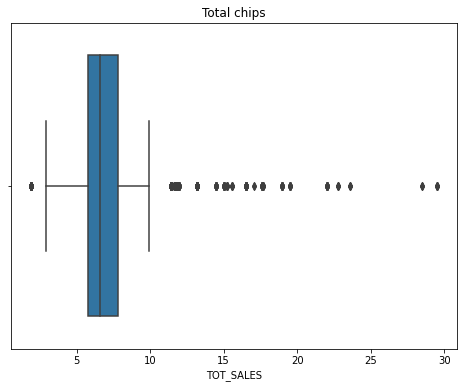

In [51]:
plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

sns.boxplot(x='TOT_SALES',data=chips_customers)
plt.title('Total chips')
plt.show()

The total sales for chips is positively skewed, showcasing 75% of the chip sale to be between 5 and 8.

In [52]:
chips_customers.LYLTY_CARD_NBR.nunique()

43625

In [53]:
chips_customers['STORE_NBR']= chips_customers['STORE_NBR'].astype('category')
chips_customers['LYLTY_CARD_NBR']= chips_customers['LYLTY_CARD_NBR'].astype('category')


/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/2681801564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_customers['STORE_NBR']= chips_customers['STORE_NBR'].astype('category')
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_1649/2681801564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_customers['LYLTY_CARD_NBR']= chips_customers['LYLTY_CARD_NBR'].astype('category')


#### SUMMARY STATISTICS FOR CUSTOMERS BUYING CHIPS 

In [54]:
chips_customers.describe()

,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000
mean,135533.580448,50.651039,1.904264,6.860511,179.815140
std,77960.794363,32.792579,0.343675,2.256661,59.017981
min,1.000000,1.000000,1.000000,1.900000,110.000000
25%,68237.250000,27.000000,2.000000,5.800000,160.000000
50%,135503.500000,42.000000,2.000000,6.600000,175.000000
75%,203284.250000,78.000000,2.000000,7.800000,175.000000
max,270209.000000,111.000000,5.000000,29.500000,380.000000


Text(0.5, 1.0, 'Chips by grams')

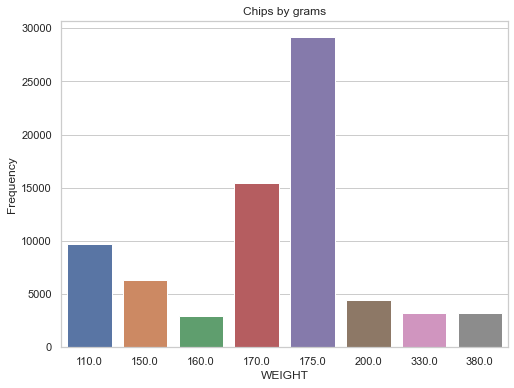

In [55]:
plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

sns.set(style="whitegrid")

# Plot the histogram using Seaborn
#sns.histplot(chips_customers['WEIGHT'], bins=10, kde=False, color='skyblue')

sns.countplot(x=chips_customers['WEIGHT'])

# Add labels and title
plt.xlabel('WEIGHT')
plt.ylabel('Frequency')
plt.title('Chips by grams')

The count plot displays that frequently bought chips are of 175 grams followed by 170 grams.

In [56]:
#IDENTIFYING OUTLIERS 
outlier_trend = chips_customers.loc[chips_customers['TOT_SALES']>10]

In [57]:
outlier_trend

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0
27,2019-05-22,130.0,130108.0,134125.0,2.0,5.0,19.0,cobs popd sour crm chives chips,110.0
28,2019-05-16,130.0,130356.0,135147.0,14.0,2.0,11.8,smiths crnkle chip orgnl big bag,380.0
29,2019-05-17,133.0,133250.0,137666.0,30.0,4.0,17.6,doritos corn chips cheese supreme,170.0
33,2019-05-22,153.0,153106.0,152359.0,30.0,3.0,13.2,doritos corn chips cheese supreme,170.0
...,...,...,...,...,...,...,...,...,...
74498,2018-12-21,261.0,261110.0,260184.0,14.0,2.0,11.8,smiths crnkle chip orgnl big bag,380.0
74506,2018-12-30,261.0,261375.0,261300.0,16.0,2.0,11.4,smiths crinkle chips salt vinegar,330.0
74511,2019-06-20,263.0,263262.0,262708.0,14.0,2.0,11.8,smiths crnkle chip orgnl big bag,380.0
74524,2019-02-11,265.0,265064.0,263356.0,14.0,2.0,11.8,smiths crnkle chip orgnl big bag,380.0


In [58]:
totSales = chips_customers.groupby(['DATE']).TOT_SALES.sum()
totSales

DATE
2018-07-03    1135.6
2018-07-04    1393.8
2018-07-05    1450.9
2018-07-06    1219.6
2018-07-07    1451.7
               ...  
2019-06-28    1309.0
2019-06-29    1265.7
2019-06-30    1603.7
2019-07-01    1473.9
2019-07-02    1498.5
Name: TOT_SALES, Length: 364, dtype: float64

Text(0, 0.5, 'Total sales')

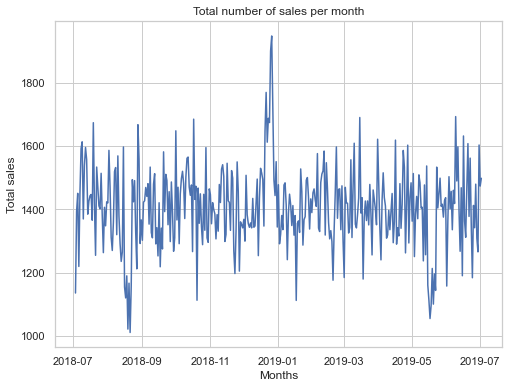

In [59]:
plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

#plot the trend line 
plt.plot(totSales)
plt.title('Total number of sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')

**Peak in January 2019**:
The visualization prominently features a peak in chip sales during the month of January 2019. This peak indicates a significant surge in sales during that period.

**Leading to January 2019**:
In the lead-up to the peak in January, the time-series reveals an upward trend in chip sales. Specific dates or months contributing to this growth are noteworthy and can be highlighted to provide context to the overall increase.

**Troughs in September 2018 and May-June 2019**:
Notably, the visualization displays troughs in chip sales during September 2018 and between May and June 2019. These troughs represent periods of relatively lower sales.

**Seasonal Patterns**:
The data suggests potential seasonal patterns in chip sales, with a distinct peak in January and contrasting troughs at specific points in the timeline.


In [60]:

def detect_outliers(df, column_name):
    """
    Detect outliers in a specific column of a DataFrame using the interquartile range (IQR) method.

    Parameters:
    - df: DataFrame
    - column_name: str, the name of the column containing the data to be analyzed

    Returns:
    - df_outliers: DataFrame, contains rows with outliers
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

    return df_no_outliers

# Example usage:
# Assuming df is your DataFrame and 'TOT_SALES' is the column name
df_no_outliers = detect_outliers(chips_customers, 'TOT_SALES')


In [61]:
df_no_outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0
5,2019-05-19,7.0,7215.0,7176.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0
...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0


In [62]:
df_no_outliers.describe()

,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,67628.000000,67628.000000,67628.000000,67628.000000,67628.000000
mean,135677.150056,53.468800,1.899731,6.489874,164.854128
std,77782.455074,32.305452,0.309095,1.681357,30.503883
min,1.000000,1.000000,1.000000,2.900000,110.000000
25%,68727.500000,28.000000,2.000000,5.800000,160.000000
50%,135680.500000,44.000000,2.000000,6.600000,170.000000
75%,203275.250000,79.000000,2.000000,7.800000,175.000000
max,270209.000000,111.000000,5.000000,9.900000,380.000000


In [63]:
df_sales = df_no_outliers.groupby(['DATE']).TOT_SALES.sum()
df_sales

DATE
2018-07-03    1002.1
2018-07-04    1135.2
2018-07-05    1226.1
2018-07-06    1042.3
2018-07-07    1268.0
               ...  
2019-06-28    1164.5
2019-06-29    1076.3
2019-06-30    1403.3
2019-07-01    1216.0
2019-07-02    1343.7
Name: TOT_SALES, Length: 364, dtype: float64

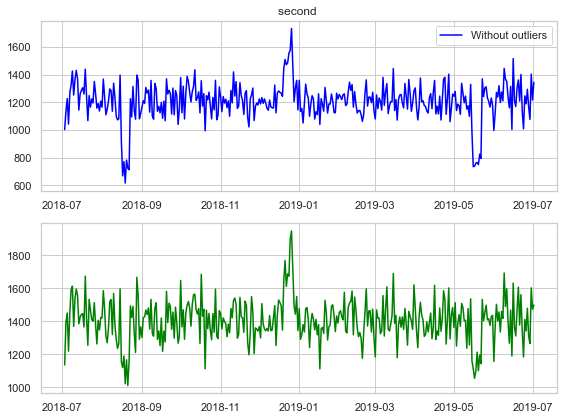

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
axes[0].plot(df_sales, label='Without outliers', color='blue')
axes[0].set_title('First Subplot')
axes[0].legend()
#plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches

axes[1].plot(totSales, label='with outliers', color='green')
axes[0].set_title('second ')
axes[0].legend()
#plot the trend line 

plt.tight_layout()

# Show the plot
plt.show()

the trend shows that irrespective of the outliers, the data showcases spike in total sales during the month of january and decline during the period of september in 2018 and decline in May of 2019. 

In [65]:
chips_customers = pd.merge(chips_customers,purchase,on='LYLTY_CARD_NBR')
chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,YOUNG SINGLES/COUPLES,Premium
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,YOUNG SINGLES/COUPLES,Premium


In [66]:
chips_customers.LYLTY_CARD_NBR.nunique()

43625

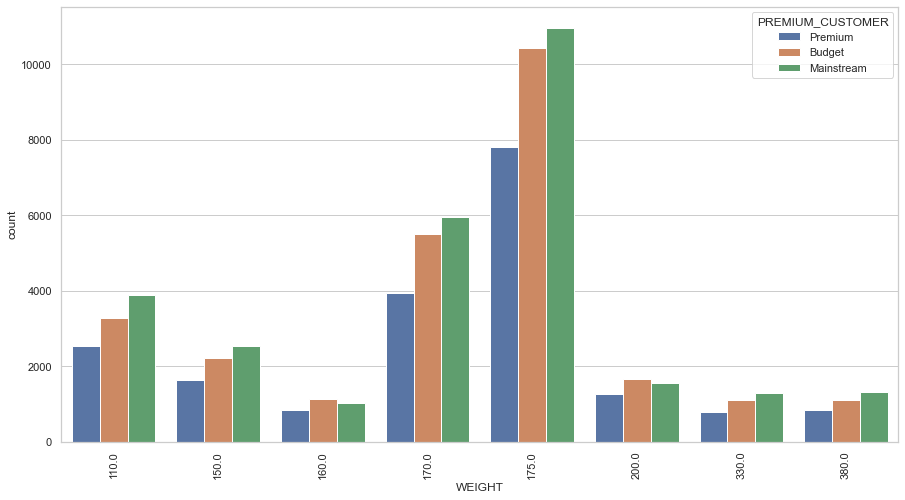

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(x=chips_customers['WEIGHT'],hue=chips_customers['PREMIUM_CUSTOMER'])
plt.xticks(rotation='vertical')
plt.show()

**Universal Preference for 175 grams**:
Across all categories—premium, budget, and mainstream—there is a unanimous preference for chips weighing 175 grams. The visualization vividly showcases this common trend, with an aggregate of approximately 30,000 purchases in this weight category.


**Mainstream's Affinity for 175 grams**:
Among the three categories, mainstream customers exhibit the highest affinity for chips weighing 175 grams. This weight category stands out as the most favored among mainstream consumers.


**Variation in Preferences**:
While 175 grams is the preferred choice for all categories, the count-plot highlights distinctions in preferences. Mainstream customers lead in the 175-gram category, followed by budget, and premium customers show a relatively lower count.


**Secondary Preference for 170 grams**:
The visualization also reveals a noteworthy trend in the 170-gram category, with approximately 17,000 chip purchases. This weight range follows a similar pattern across all categories, demonstrating a secondary but substantial preference among consumers.


**Insights for Decision-Making**:
The count-plot provides valuable insights into the preferred chip weights among different customer segments. This information can guide inventory management, marketing strategies, and product development, tailoring offerings to meet the distinct preferences of each category.

In [68]:
chips_customers.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000
mean,1.359095e+05,135533.580448,50.651039,1.904264,6.860511,179.815140
std,8.025342e+04,77960.794363,32.792579,0.343675,2.256661,59.017981
min,1.000000e+03,1.000000,1.000000,1.000000,1.900000,110.000000
25%,7.013000e+04,68237.250000,27.000000,2.000000,5.800000,160.000000
50%,1.311975e+05,135503.500000,42.000000,2.000000,6.600000,175.000000
75%,2.032402e+05,203284.250000,78.000000,2.000000,7.800000,175.000000
max,2.373711e+06,270209.000000,111.000000,5.000000,29.500000,380.000000


In [69]:
brands = chips_customers['PRODUCT'].str.split().str.get(0)
brands.value_counts()

smiths      16872
doritos     15874
thins       14075
cobs         9693
ww           7443
natural      6050
tostitos     3145
french       1418
Name: PRODUCT, dtype: int64

In [70]:
chips_customers['BRAND'] = brands.str.upper()
brand_names = {"WW":"WOOLWORTHS"}
chips_customers['BRAND'].replace(brand_names,inplace=True)
sum_of_trans = chips_customers.groupby(['LYLTY_CARD_NBR']).agg({'TXN_ID':'count',"TOT_SALES":'sum','PRODUCT':'count'})
sum_of_trans

,TXN_ID,TOT_SALES,PRODUCT
LYLTY_CARD_NBR,,,
1000.0,1,6.0,1
1003.0,1,3.0,1
1004.0,1,1.9,1
1011.0,1,2.9,1
1013.0,1,3.9,1
...,...,...,...
2330251.0,1,11.8,1
2330291.0,1,1.9,1
2330311.0,1,4.4,1


In [71]:
#to plot stacked bars
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """ To plot stacked bars for the number of companies or clients who 
    have churned """

    ax= dataframe.plot(
    kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Premium", "Budget","Mainstream"], loc=legend_) 
                # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
    
   

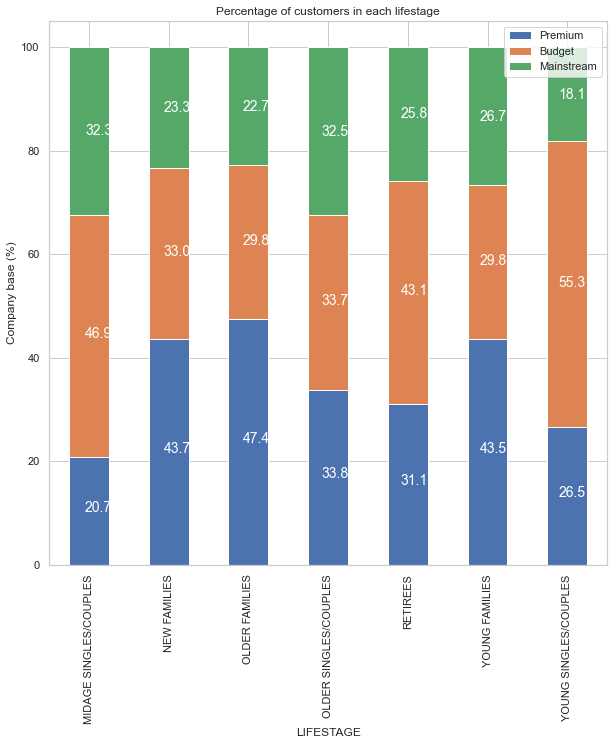

In [72]:
premium_lifestage = chips_customers.groupby([chips_customers['LIFESTAGE'],chips_customers['PREMIUM_CUSTOMER']])['LYLTY_CARD_NBR'].count().unstack(level=0)
tot_life= premium_lifestage/premium_lifestage.sum() * 100
plot_stacked_bars(tot_life.transpose(),'Percentage of customers in each lifestage',(10,10),rot_=90)


**Proportional Representation**:
The stacked bars vividly represent the premium category's distribution across different lifestage categories. Each bar is segmented to reflect the proportional contribution of the premium category within the overall product offering.

**Lifestage Categories**:
The x-axis delineates distinct lifestage categories, providing a comprehensive view of how the premium category is distributed across various consumer segments. This segmentation enables a nuanced understanding of customer preferences based on lifestage.

**Company Base Percentage Annotation**:
The annotations on the stacked bars incorporate the company's base percentage, providing additional context to the proportional representation. This allows for a clear comparison of the premium category's significance within each lifestage category relative to the overall company base.

**Insights into Premium Category Penetration**:
Through this visualization, one can glean insights into the penetration of the premium category within different lifestage segments. Whether the premium category dominates in specific age groups or appeals more broadly across lifestages becomes discernible, aiding strategic decision-making.

The annotated stacked bar plot serves as a valuable tool for strategic planning, helping stakeholders identify target demographics and assess the success of premium category positioning. This nuanced understanding supports data-driven decision-making for marketing campaigns, product development, and resource allocation.

In [73]:
chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium,NATURAL
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget,DORITOS
...,...,...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,YOUNG SINGLES/COUPLES,Premium,THINS


In [74]:
#to compare the total sales to lifestage in each quarter
#groupby the total sales made in each lifestage category
totSales

DATE
2018-07-03    1135.6
2018-07-04    1393.8
2018-07-05    1450.9
2018-07-06    1219.6
2018-07-07    1451.7
               ...  
2019-06-28    1309.0
2019-06-29    1265.7
2019-06-30    1603.7
2019-07-01    1473.9
2019-07-02    1498.5
Name: TOT_SALES, Length: 364, dtype: float64

In [75]:
#converting date to just year and month 
yearmonth = chips_customers['DATE'].dt.strftime('%Y%m')
chips_customers['YEAR_MONTH']=yearmonth
chips_customers['YEAR_MONTH'] = chips_customers['YEAR_MONTH'].astype(int)
chips_customers.dtypes

DATE                datetime64[ns]
STORE_NBR                 category
LYLTY_CARD_NBR             float64
TXN_ID                     float64
PROD_NBR                   float64
PROD_QTY                   float64
TOT_SALES                  float64
PRODUCT                     object
WEIGHT                     float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
BRAND                       object
YEAR_MONTH                   int64
dtype: object

In [76]:
chips_customers['YEAR_MONTH'].value_counts()

201812    6467
201810    6411
201903    6359
201905    6308
201808    6239
201901    6200
201906    6166
201811    6105
201904    6100
201809    6054
201807    6017
201902    5715
201907     429
Name: YEAR_MONTH, dtype: int64

## Customer insights 
With respect to customer lifestage, premium category and brand purchase frequency



In [77]:
chips_lifestage = chips_customers.groupby(['LIFESTAGE','YEAR_MONTH']).TOT_SALES.sum()
chips_lifestage

LIFESTAGE               YEAR_MONTH
MIDAGE SINGLES/COUPLES  201807        4257.2
                        201808        3964.2
                        201809        4162.2
                        201810        4015.6
                        201811        3890.3
                                       ...  
YOUNG SINGLES/COUPLES   201903        5957.2
                        201904        5734.5
                        201905        5264.3
                        201906        5536.5
                        201907         531.9
Name: TOT_SALES, Length: 91, dtype: float64

In [78]:
nTxn_lifestage = chips_customers.groupby(['LIFESTAGE','YEAR_MONTH']).TXN_ID.nunique()
nTxn_lifestage

LIFESTAGE               YEAR_MONTH
MIDAGE SINGLES/COUPLES  201807        606
                        201808        582
                        201809        594
                        201810        579
                        201811        554
                                     ... 
YOUNG SINGLES/COUPLES   201903        882
                        201904        845
                        201905        822
                        201906        818
                        201907         80
Name: TXN_ID, Length: 91, dtype: int64

In [79]:
nChipsPerTxn = chips_customers.groupby(['LIFESTAGE','YEAR_MONTH']).PROD_QTY.sum()
nChipsPerTxn

LIFESTAGE               YEAR_MONTH
MIDAGE SINGLES/COUPLES  201807        1161.0
                        201808        1093.0
                        201809        1140.0
                        201810        1107.0
                        201811        1061.0
                                       ...  
YOUNG SINGLES/COUPLES   201903        1622.0
                        201904        1569.0
                        201905        1453.0
                        201906        1518.0
                        201907         147.0
Name: PROD_QTY, Length: 91, dtype: float64

In [80]:
#measuring the performances of the 3 variables based on lifestage categories 
data = [chips_lifestage, nTxn_lifestage, nChipsPerTxn]
kpi_measure = pd.concat(data,join = 'outer',axis=1)
kpi_measure

TOT_SALES  TXN_ID  PROD_QTY
LIFESTAGE              YEAR_MONTH                             
MIDAGE SINGLES/COUPLES 201807         4257.2     606    1161.0
                       201808         3964.2     582    1093.0
                       201809         4162.2     594    1140.0
                       201810         4015.6     579    1107.0
                       201811         3890.3     554    1061.0
...                                      ...     ...       ...
YOUNG SINGLES/COUPLES  201903         5957.2     882    1622.0
                       201904         5734.5     845    1569.0
                       201905         5264.3     822    1453.0
                       201906         5536.5     818    1518.0
                       201907          531.9      80     147.0

[91 rows x 3 columns]

In [81]:
kpi_measure.reset_index(inplace=True)
kpi_measure

,LIFESTAGE,YEAR_MONTH,TOT_SALES,TXN_ID,PROD_QTY
0,MIDAGE SINGLES/COUPLES,201807,4257.2,606,1161.0
1,MIDAGE SINGLES/COUPLES,201808,3964.2,582,1093.0
2,MIDAGE SINGLES/COUPLES,201809,4162.2,594,1140.0
3,MIDAGE SINGLES/COUPLES,201810,4015.6,579,1107.0
4,MIDAGE SINGLES/COUPLES,201811,3890.3,554,1061.0
...,...,...,...,...,...
86,YOUNG SINGLES/COUPLES,201903,5957.2,882,1622.0
87,YOUNG SINGLES/COUPLES,201904,5734.5,845,1569.0
88,YOUNG SINGLES/COUPLES,201905,5264.3,822,1453.0
89,YOUNG SINGLES/COUPLES,201906,5536.5,818,1518.0


In [82]:
kpi_measure['TXN_MONTH'] = pd.to_datetime(kpi_measure['YEAR_MONTH'].astype(str), format = '%Y%m')


In [83]:
kpi_measure

,LIFESTAGE,YEAR_MONTH,TOT_SALES,TXN_ID,PROD_QTY,TXN_MONTH
0,MIDAGE SINGLES/COUPLES,201807,4257.2,606,1161.0,2018-07-01
1,MIDAGE SINGLES/COUPLES,201808,3964.2,582,1093.0,2018-08-01
2,MIDAGE SINGLES/COUPLES,201809,4162.2,594,1140.0,2018-09-01
3,MIDAGE SINGLES/COUPLES,201810,4015.6,579,1107.0,2018-10-01
4,MIDAGE SINGLES/COUPLES,201811,3890.3,554,1061.0,2018-11-01
...,...,...,...,...,...,...
86,YOUNG SINGLES/COUPLES,201903,5957.2,882,1622.0,2019-03-01
87,YOUNG SINGLES/COUPLES,201904,5734.5,845,1569.0,2019-04-01
88,YOUNG SINGLES/COUPLES,201905,5264.3,822,1453.0,2019-05-01
89,YOUNG SINGLES/COUPLES,201906,5536.5,818,1518.0,2019-06-01


In [84]:
controlSalesPlot = kpi_measure.loc[kpi_measure['LIFESTAGE']=='MIDAGE SINGLES/COUPLES',['TXN_MONTH','TOT_SALES']]
controlSalesPlot.set_index('TXN_MONTH',inplace=True)

In [85]:
controlSalesPlot

,TOT_SALES
TXN_MONTH,
2018-07-01,4257.2
2018-08-01,3964.2
2018-09-01,4162.2
2018-10-01,4015.6
2018-11-01,3890.3
2018-12-01,4161.9
2019-01-01,4210.8
2019-02-01,3691.4
2019-03-01,3833.6


In [86]:
kpi_measure.LIFESTAGE.unique()

array(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'], dtype=object)

In [87]:
new_fam = kpi_measure.loc[kpi_measure['LIFESTAGE']=='NEW FAMILIES',['TXN_MONTH','TOT_SALES']]
new_fam.set_index('TXN_MONTH',inplace=True)
controlSalesPlot.rename(columns={'TOT_SALES':'MIDAGE_COUPLES_SINGLES'},inplace=True)
new_fam.rename(columns={'TOT_SALES':'NEW_FAMILIES'},inplace=True)

old_fam = kpi_measure.loc[kpi_measure['LIFESTAGE']=='OLDER FAMILIES',['TXN_MONTH','TOT_SALES']]
old_fam.set_index('TXN_MONTH',inplace=True)
old_fam.rename(columns={'TOT_SALES':'OLDER_FAMILIES'},inplace=True)

old_single = kpi_measure.loc[kpi_measure['LIFESTAGE']=='OLDER SINGLES/COUPLES',['TXN_MONTH','TOT_SALES']]
old_single.set_index('TXN_MONTH',inplace=True)
old_single.rename(columns={'TOT_SALES':'OLDER_SINGLE_COUPLES'},inplace=True)

retired = kpi_measure.loc[kpi_measure['LIFESTAGE']=='RETIREES',['TXN_MONTH','TOT_SALES']]
retired.set_index('TXN_MONTH',inplace=True)
retired.rename(columns={'TOT_SALES':'RETIRED'},inplace=True)

young_fam = kpi_measure.loc[kpi_measure['LIFESTAGE']=='YOUNG FAMILIES',['TXN_MONTH','TOT_SALES']]
young_fam.set_index('TXN_MONTH',inplace=True)
young_fam.rename(columns={'TOT_SALES':'YOUNG FAMILIES'},inplace=True)

yng_single = kpi_measure.loc[kpi_measure['LIFESTAGE']=='YOUNG SINGLES/COUPLES',['TXN_MONTH','TOT_SALES']]
yng_single.set_index('TXN_MONTH',inplace=True)
yng_single.rename(columns={'TOT_SALES':'YOUNG_SINGLES_COUPLES'},inplace=True)



In [88]:
CustomerPlot = pd.concat([controlSalesPlot,new_fam,old_fam,old_single,retired,young_fam,yng_single],axis=1)
CustomerPlot

,MIDAGE_COUPLES_SINGLES,NEW_FAMILIES,OLDER_FAMILIES,OLDER_SINGLE_COUPLES,RETIRED,YOUNG FAMILIES,YOUNG_SINGLES_COUPLES
TXN_MONTH,,,,,,,
2018-07-01,4257.2,864.4,7918.0,8617.0,7539.9,6918.5,5371.8
2018-08-01,3964.2,1055.2,7660.7,8512.6,8176.2,6863.6,5558.5
2018-09-01,4162.2,1049.8,7500.5,8638.5,7651.8,6883.5,5858.3
2018-10-01,4015.6,1156.9,8217.5,9585.3,8097.0,7192.6,6179.7
2018-11-01,3890.3,1212.5,7788.8,8759.4,7813.7,6916.6,5556.5
2018-12-01,4161.9,1039.3,8180.0,9363.5,8448.5,7212.1,6248.0
2019-01-01,4210.8,1044.4,8173.0,8257.6,7821.4,7571.5,5824.8
2019-02-01,3691.4,1181.9,7196.3,8541.5,7711.6,6565.3,4824.4
2019-03-01,3833.6,1076.9,8121.8,9035.3,8331.9,7302.2,5957.2


<function matplotlib.pyplot.show(close=None, block=None)>

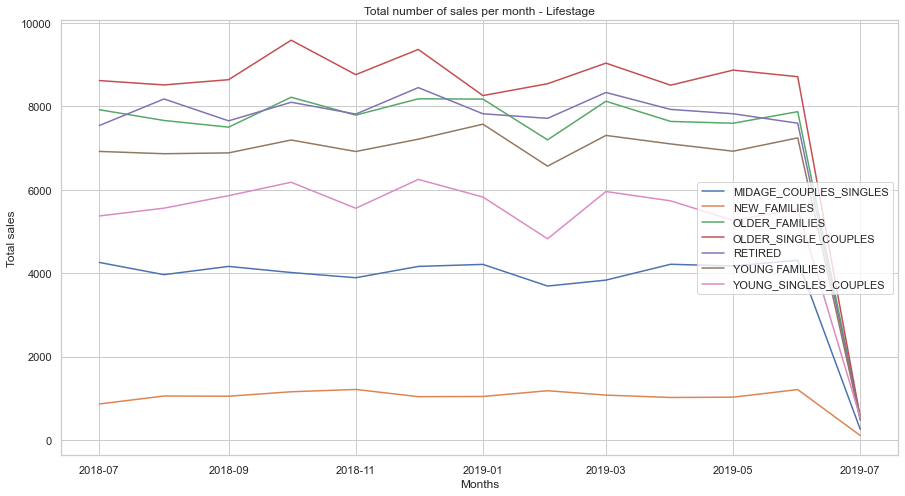

In [89]:
plt.figure(figsize=(15,8))
plt.plot(CustomerPlot)
plt.title('Total number of sales per month - Lifestage')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['MIDAGE_COUPLES_SINGLES',	'NEW_FAMILIES',	'OLDER_FAMILIES',	'OLDER_SINGLE_COUPLES', 'RETIRED',	'YOUNG FAMILIES',	'YOUNG_SINGLES_COUPLES'], loc = 5)
plt.show

**Temporal Trends**:
The x-axis delineates the progression of time or lifestage categories, while the y-axis represents the total number of sales. The line plot encapsulates temporal trends, providing a visual narrative of how sales evolve across various lifestages.

**Sales Disparities among Lifestages**:
The plot distinctly highlights variations in total sales across lifestage categories. Notably, the highest sales are attributed to older single couples, underscoring their significant contribution to overall sales. Conversely, new families consistently exhibit the lowest sales, hovering around a constant 1500 throughout the fiscal year.

**January 2019 Peaks**:
An intriguing aspect revealed by the plot is the notable peak in sales during January 2019. This surge is particularly prominent for young singles, young couples, and older families. However, a counterintuitive trend emerges for older families, as their sales decline drastically by approximately 1000 units during this peak month.

**Temporal Dynamics**:
The line plot effectively captures the temporal dynamics of sales, offering insights into the ebb and flow of consumer demand across lifestages. Peaks and declines provide a visual narrative of the changing preferences and purchasing patterns throughout the fiscal year.

**Strategic Considerations**:
The identification of older single couples as the highest contributors to sales suggests a strategic opportunity to tailor marketing and product offerings to this demographic. Meanwhile, the January 2019 peaks and declines for certain lifestage categories warrant further investigation to understand the factors influencing these fluctuations, enabling targeted strategies for optimisation.

### Customer indicators for premium categories 

In [90]:
#kpi for premium categories 
tot_sales_summary = chips_customers.TOT_SALES.agg(['mean'])
print(tot_sales_summary)

mean    6.860511
Name: TOT_SALES, dtype: float64


In [91]:
 
chips_customers['TXN_MONTH'] = pd.to_datetime(chips_customers['YEAR_MONTH'].astype(str), format = '%Y%m')
chips_customers.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,YEAR_MONTH,TXN_MONTH
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium,NATURAL,201810,2018-10-01
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201808,2018-08-01
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget,DORITOS,201808,2018-08-01


In [92]:
#groupby premium 
sub_groupby=chips_customers.groupby(['TXN_MONTH','PREMIUM_CUSTOMER','LIFESTAGE'],axis=0,as_index=False)

In [93]:
sub_groupby.TOT_SALES.agg(['mean','median','sum','std'])

mean  median     sum  \
TXN_MONTH  PREMIUM_CUSTOMER LIFESTAGE                                          
2018-07-01 Budget           MIDAGE SINGLES/COUPLES  6.695349     6.6   863.7   
                            NEW FAMILIES            6.672414     6.6   387.0   
                            OLDER FAMILIES          7.009158     6.6  3827.0   
                            OLDER SINGLES/COUPLES   7.050000     6.6  2946.9   
                            RETIREES                7.200833     7.6  2592.3   
...                                                      ...     ...     ...   
2019-07-01 Premium          OLDER FAMILIES          7.037500     6.3   112.6   
                            OLDER SINGLES/COUPLES   7.955556     7.6   214.8   
                            RETIREES                7.952632     8.8   151.1   
                            YOUNG FAMILIES          6.212500     6.0    99.4   
                            YOUNG SINGLES/COUPLES   5.858333     6.3    70.3   

                                                         std  
TXN_MONTH  PREMIUM_CUSTOMER LIFESTAGE                         
2018-07-01 Budget           MIDAGE SINGLES/COUPLES  2.209492  
                            NEW FAMILIES            2.307029  
                            OLDER FAMILIES          2.142653  
                            OLDER SINGLES/COUPLES   2.119299  
                            RETIREES                2.144884  
...                                                      ...  
2019-07-01 Premium          OLDER FAMILIES          2.227368  
                            OLDER SINGLES/COUPLES   2.490186  
                            RETIREES                2.534291  
                            YOUNG FAMILIES          0.753547  
                            YOUNG SINGLES/COUPLES   2.262122  

[273 rows x 4 columns]

Since the peaks in total sales is around new year and sudden plunge around september, we can check the lapse rate


In [94]:
chips_premium = chips_customers.groupby(['PREMIUM_CUSTOMER','TXN_MONTH']).TOT_SALES.sum()
chips_premium

PREMIUM_CUSTOMER  TXN_MONTH 
Budget            2018-07-01    14914.8
                  2018-08-01    14954.3
                  2018-09-01    14523.0
                  2018-10-01    15517.6
                  2018-11-01    14900.6
                  2018-12-01    15648.5
                  2019-01-01    14993.5
                  2019-02-01    13630.4
                  2019-03-01    15323.1
                  2019-04-01    14758.5
                  2019-05-01    14800.1
                  2019-06-01    15162.4
                  2019-07-01     1058.1
Mainstream        2018-07-01    16036.5
                  2018-08-01    16318.1
                  2018-09-01    16281.0
                  2018-10-01    17344.1
                  2018-11-01    15885.6
                  2018-12-01    17441.7
                  2019-01-01    16743.9
                  2019-02-01    15700.0
                  2019-03-01    16883.6
                  2019-04-01    16057.0
                  2019-05-01    15789.0
           

In [95]:
nChipsPerTxn_2 = chips_customers.groupby(['PREMIUM_CUSTOMER','TXN_MONTH']).PROD_QTY.sum()


In [96]:
data2 = [chips_premium, nChipsPerTxn_2]
kpi_measure2 = pd.concat(data2,join = 'outer',axis=1)
kpi_measure2

TOT_SALES  PROD_QTY
PREMIUM_CUSTOMER TXN_MONTH                      
Budget           2018-07-01    14914.8    4114.0
                 2018-08-01    14954.3    4165.0
                 2018-09-01    14523.0    4082.0
                 2018-10-01    15517.6    4350.0
                 2018-11-01    14900.6    4182.0
                 2018-12-01    15648.5    4398.0
                 2019-01-01    14993.5    4158.0
                 2019-02-01    13630.4    3785.0
                 2019-03-01    15323.1    4319.0
                 2019-04-01    14758.5    4102.0
                 2019-05-01    14800.1    4145.0
                 2019-06-01    15162.4    4282.0
                 2019-07-01     1058.1     304.0
Mainstream       2018-07-01    16036.5    4447.0
                 2018-08-01    16318.1    4452.0
                 2018-09-01    16281.0    4443.0
                 2018-10-01    17344.1    4726.0
                 2018-11-01    15885.6    4361.0
                 2018-12-01    17441.7    4787.0
                 2019-01-01    16743.9    4564.0
                 2019-02-01    15700.0    4310.0
                 2019-03-01    16883.6    4626.0
                 2019-04-01    16057.0    4421.0
                 2019-05-01    15789.0    4352.0
                 2019-06-01    16324.9    4474.0
                 2019-07-01     1175.3     324.0
Premium          2018-07-01    10535.5    2969.0
                 2018-08-01    10518.6    2894.0
                 2018-09-01    10940.6    3091.0
                 2018-10-01    11582.9    3226.0
                 2018-11-01    11151.6    3124.0
                 2018-12-01    11563.1    3213.0
                 2019-01-01    11166.1    3147.0
                 2019-02-01    10382.0    2871.0
                 2019-03-01    11452.2    3237.0
                 2019-04-01    11320.9    3187.0
                 2019-05-01    11081.8    3082.0
                 2019-06-01    10988.4    3088.0
                 2019-07-01      739.0     199.0

In [97]:
kpi_measure2.reset_index(inplace=True)

In [98]:
budget = kpi_measure2.loc[kpi_measure2['PREMIUM_CUSTOMER']=='Budget',['TXN_MONTH','TOT_SALES']]
budget.set_index('TXN_MONTH',inplace=True)
budget.rename(columns={'TOT_SALES':'BUDGET'},inplace=True)

In [99]:
budget

,BUDGET
TXN_MONTH,
2018-07-01,14914.8
2018-08-01,14954.3
2018-09-01,14523.0
2018-10-01,15517.6
2018-11-01,14900.6
2018-12-01,15648.5
2019-01-01,14993.5
2019-02-01,13630.4
2019-03-01,15323.1


In [100]:
premium = kpi_measure2.loc[kpi_measure2['PREMIUM_CUSTOMER']=='Premium',['TXN_MONTH','TOT_SALES']]
premium.set_index('TXN_MONTH',inplace=True)
premium.rename(columns={'TOT_SALES':'PREMIUM'},inplace=True)

In [101]:
mainstream = kpi_measure2.loc[kpi_measure2['PREMIUM_CUSTOMER']=='Mainstream',['TXN_MONTH','TOT_SALES']]
mainstream.set_index('TXN_MONTH',inplace=True)
mainstream.rename(columns={'TOT_SALES':'Mainstream'},inplace=True)

In [102]:
mainstream

,Mainstream
TXN_MONTH,
2018-07-01,16036.5
2018-08-01,16318.1
2018-09-01,16281.0
2018-10-01,17344.1
2018-11-01,15885.6
2018-12-01,17441.7
2019-01-01,16743.9
2019-02-01,15700.0
2019-03-01,16883.6


In [103]:
premium_plot = pd.concat([budget,premium,mainstream])


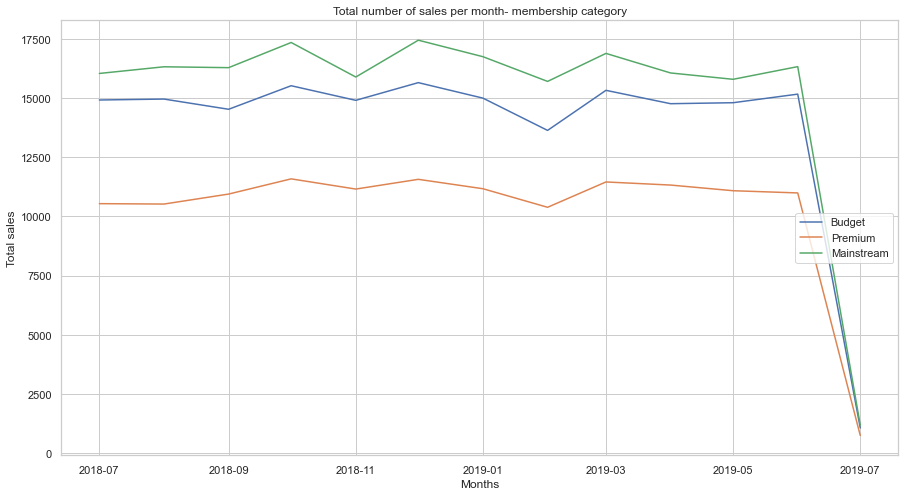

In [104]:
plt.figure(figsize=(15,8))
plt.plot(premium_plot)
plt.title('Total number of sales per month- membership category')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Budget',	'Premium',	'Mainstream'],loc=5)

**Mainstream Dominance**:
Mainstream premium category emerges as the sales leader, boasting the highest sales figures. Notably, sales peak in October and December, indicative of heightened demand during these months. However, a substantial decline of approximately 2000 sales occurs in February, marking a shift in consumer behavior.

**Budget Category Fluctuations**:
The budget premium category, while exhibiting a smaller peak in October and December (around 500 sales), experiences a more pronounced decline in February with approximately 2500 fewer sales. This contrast suggests a distinct pattern in budget category sales behavior compared to the mainstream.

**Premium Category Stability**:
Premium category sales, while consistently lower in magnitude (between 10,000 and 11,500), showcase a steady decline in February. The plot indicates a more stable sales trajectory for premium products compared to the noticeable fluctuations observed in the mainstream and budget categories.

**Seasonal Peaks and Declines**:
The identified peaks in October and December across all premium categories suggest a seasonal pattern in consumer behavior. However, the varying degrees of decline in February highlight nuanced differences in how each category responds during this period.


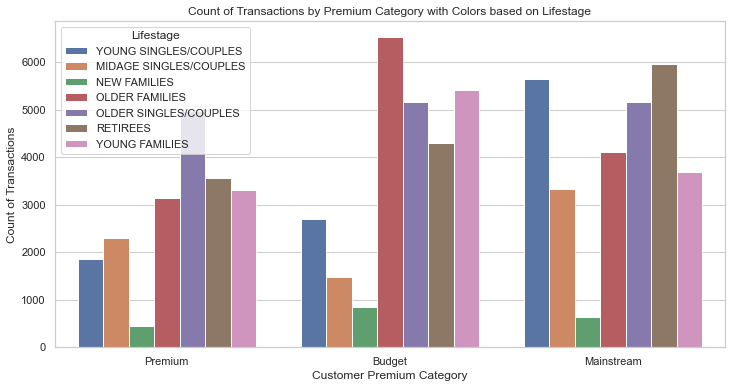

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PREMIUM_CUSTOMER', hue='LIFESTAGE', data=chips_customers)
plt.title('Count of Transactions by Premium Category with Colors based on Lifestage')
plt.xlabel('Customer Premium Category')
plt.ylabel('Count of Transactions')
plt.legend(title='Lifestage')
plt.show()

***Distinct Transaction Profiles**:
The count plot elegantly delineates the transaction profiles for each premium category. Each category is represented by a distinct color, allowing for a clear visual comparison of their transaction volumes across different lifestages.

**Lifestage Variations**:
Hues of lifestages enhance the plot, showcasing how transaction patterns vary among different consumer segments. This color-coded approach enables stakeholders to quickly identify trends and preferences specific to young singles, young couples, older families, and other lifestage categories.

**Cumulative Sales Distribution**:
The count plot reinforces the earlier trend line observations, revealing that budget and mainstream categories boast the highest cumulative sales. In contrast, the premium category, while contributing significantly, has fewer members, aligning with its lower total sales.

**Budget Category Consumer Demographics**:
For the budget category, older families emerge as the highest consumers, followed by young families and older singles/couples. This hierarchical pattern provides valuable insights into the preferences of distinct lifestage segments within the budget category.

**Mainstream Category Consumer Demographics**:
Mainstream category consumers predominantly consist of retirees, positioning them as the primary market. Following retirees, young singles/couples and older singles/couples constitute the next significant consumer groups within the mainstream category.

**Premium Category Consumer Demographics**:
The premium category showcases a distinctive consumer profile, with older singles/couples leading as the highest consumers. Notably, retirees and young families follow, emphasizing the premium category's appeal across diverse lifestage segments.

*Lifestage with Least Consumers*:
New families emerge as the lifestage category with the least number of consumers across all premium categories. The count plot underscores the relatively lower engagement of new families, with both minimum and maximum consumer counts below 1000 in each category.

older singles and couples have been consistent with about 5000 transactions in each category, therefore summing up to 15000 transactions being the category willing to spend the most by proving the trend. 

In [106]:
chips_customers.BRAND.value_counts()

SMITHS        16872
DORITOS       15874
THINS         14075
COBS           9693
WOOLWORTHS     7443
NATURAL        6050
TOSTITOS       3145
FRENCH         1418
Name: BRAND, dtype: int64

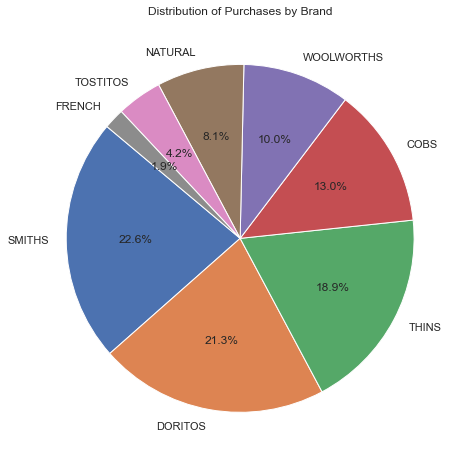

In [107]:
brand_counts = chips_customers['BRAND'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Brand')
plt.show()

**Smiths Dominance**:
Smiths emerges as the dominant player in the chip market, commanding a significant share of sales at 22.6%. The expansive wedge dedicated to Smiths underscores its substantial contribution to the overall chip sales landscape.

**Diverse Brand Contributions**:
The pie chart vividly showcases the diversity in sales contributions across the remaining eight brands. Each brand is represented by a distinct slice, allowing for a quick and intuitive comparison of their respective market shares.

**French Fries Potato Chips**:
Among the nine brands, French Fries Potato Chips holds the smallest slice, representing 1.9% of the total sales. This highlights its relatively smaller market presence compared to the other brands.

**Doritos as a Strong Contender**:
Following closely behind Smiths, Doritos emerges as the second most bought brand with a difference of 1.3%. The sizable slice dedicated to Doritos underscores its substantial market presence and popularity among consumers.

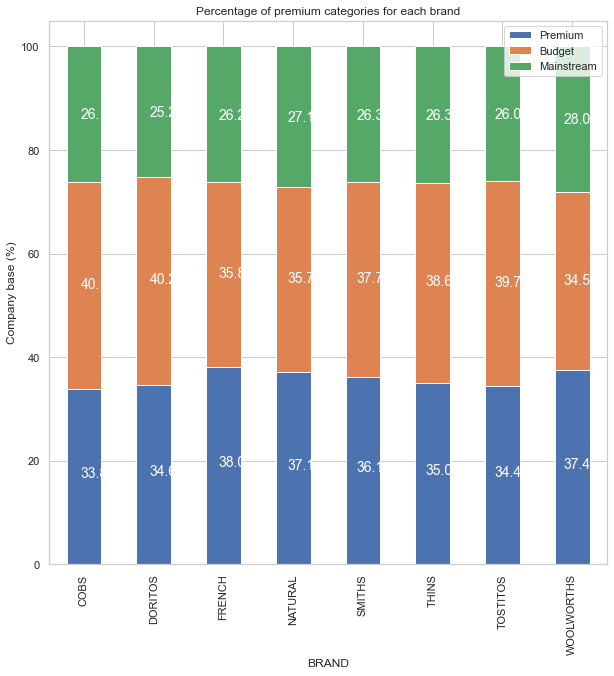

In [108]:
premium_brand= chips_customers.groupby([chips_customers['BRAND'],chips_customers['PREMIUM_CUSTOMER']])['LYLTY_CARD_NBR'].count().unstack(level=0)
tot_brand= premium_brand/premium_brand.sum() * 100
plot_stacked_bars(tot_brand.transpose(),'Percentage of premium categories for each brand',(10,10),rot_=90)


In [109]:
category_prob = pd.crosstab(chips_customers.LIFESTAGE, [chips_customers.PREMIUM_CUSTOMER], normalize='index')
display(category_prob.round(4)*100)

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,20.73,46.92,32.35
NEW FAMILIES,43.66,33.00,23.34
OLDER FAMILIES,47.45,29.84,22.72
OLDER SINGLES/COUPLES,33.80,33.73,32.48
RETIREES,31.12,43.06,25.82
YOUNG FAMILIES,43.53,29.76,26.71
YOUNG SINGLES/COUPLES,26.55,55.32,18.14


In [110]:
#percentage changes in buying behaviour 

def calculate_percentage_change(data, category_column, value_column):
    """
    Calculate percentage changes in total products with respect to each category.

    Parameters:
    - data: DataFrame containing the relevant data.
    - category_column: Column name representing the customer premium category.
    - value_column: Column name representing the product quantity.

    Returns:
    - DataFrame with percentage changes for each premium category.
    """

    # Ensure the specified columns exist in the DataFrame
    if category_column not in data.columns or value_column not in data.columns:
        raise ValueError(f"Columns '{category_column}' and '{value_column}' must be present in the DataFrame.")

    # Group by premium category and calculate the sum of product quantity for each category
    total_products_by_category = data.groupby(category_column)[value_column].sum()

    # Calculate the percentage change
    percentage_change = total_products_by_category.pct_change() * 100

    # Create a DataFrame with the results
    result_df = pd.DataFrame({
        'Premium_Category': percentage_change.index,
        'Percentage_Change': percentage_change.values
    })

    return result_df

In [111]:
total_products_by_category = chips_customers.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

In [112]:
percentage_change = total_products_by_category.pct_change() * 100


In [113]:
result_df = pd.DataFrame({
        'Premium_Category': percentage_change.index,
        'Percentage_Change': percentage_change.values
    })


In [114]:
result_df

,Premium_Category,Percentage_Change
0,Budget,NaN
1,Mainstream,9.876410
2,Premium,-32.608229


# price trends in premium category


In [115]:
premium1 = chips_customers.drop(labels=['PROD_NBR','PROD_QTY','YEAR_MONTH','TXN_ID','LYLTY_CARD_NBR'],axis=1)

#CREATING A PIVOT TABLE TO CALCULATE THE MEAN FOR EACH PREMIUM CATEGORY
pt = premium1.pivot_table(index=['PREMIUM_CUSTOMER']).sort_values(by='TOT_SALES')

#add columns to show the percentage difference from budget category 


In [116]:
pt

,TOT_SALES,WEIGHT
PREMIUM_CUSTOMER,,
Premium,6.811451,179.446600
Budget,6.814087,179.749461
Mainstream,6.937198,180.128946


In [117]:
pt1 = pt.assign(sales_budget= pt.apply(lambda r: r.TOT_SALES * 100 / pt.loc['Budget', 'TOT_SALES'], axis=1),
                )
pt2 = pt1.copy()


In [118]:
pt2.loc[:,'sales_budget'] = pt1.loc[:,'sales_budget'].map('{:,.1f}%'.format)
pt2

,TOT_SALES,WEIGHT,sales_budget
PREMIUM_CUSTOMER,,,
Premium,6.811451,179.446600,100.0%
Budget,6.814087,179.749461,100.0%
Mainstream,6.937198,180.128946,101.8%


In [119]:
#categorising brands 
chips_customers['BRAND']= chips_customers.BRAND.astype('category')


In [120]:
brand1 = chips_customers.drop(labels=['PROD_NBR','YEAR_MONTH','TXN_ID','LYLTY_CARD_NBR'],axis=1)
brand_pt = brand1.pivot_table(index=['BRAND']).sort_values(by='TOT_SALES')


In [121]:
brand_pt

,PROD_QTY,TOT_SALES,WEIGHT
BRAND,,,
WOOLWORTHS,1.884858,3.581231,184.038694
FRENCH,1.863893,5.591678,175.000000
NATURAL,1.888264,5.664793,175.000000
THINS,1.913250,6.312789,175.000000
COBS,1.915919,7.280491,110.000000
SMITHS,1.896574,7.659898,241.899301
DORITOS,1.914388,8.038132,161.966738
TOSTITOS,1.913196,8.418060,175.000000


## price trends in brands 

In [122]:
brand_pt1 = brand_pt.assign(sales_smiths= brand_pt.apply(lambda r: r.TOT_SALES * 100 / brand_pt.loc['SMITHS', 'TOT_SALES'], axis=1),
                )
brand_pt2 = brand_pt1.copy()



In [123]:
#percentage difference for brands in comparison to smiths 
brand_pt2.loc[:,'sales_smiths'] = brand_pt1.loc[:,'sales_smiths'].map('{:,.1f}%'.format)
brand_pt2

,PROD_QTY,TOT_SALES,WEIGHT,sales_smiths
BRAND,,,,
WOOLWORTHS,1.884858,3.581231,184.038694,46.8%
FRENCH,1.863893,5.591678,175.000000,73.0%
NATURAL,1.888264,5.664793,175.000000,74.0%
THINS,1.913250,6.312789,175.000000,82.4%
COBS,1.915919,7.280491,110.000000,95.0%
SMITHS,1.896574,7.659898,241.899301,100.0%
DORITOS,1.914388,8.038132,161.966738,104.9%
TOSTITOS,1.913196,8.418060,175.000000,109.9%


**Sales Percentage Compared to Smiths**:
The sales percentage column offers a comparative view, showcasing each brand's sales performance as a percentage of Smiths' total sales. This metric is particularly valuable for gauging market competitiveness and brand positioning.

The sales_smiths column expresses the sales performance of each brand as a percentage of Smiths' total sales. Woolworths at 46.8%, French at 73.0%, Natural at 74.0%, Thins at 82.4%, Cobs at 95.0%, Smiths at 100.0%, Doritos at 104.9%, and Tostitos at 109.9%. This percentage comparison offers insights into market competitiveness.

The sales percentage in comparison to Smiths provides a clear indication of market competitiveness. Cobs, at 95.0%, holds a robust market share, closely followed by Smiths. Doritos and Tostitos demonstrate strong competitiveness, surpassing Smiths with sales percentages exceeding 100%. These brands showcase the ability to capture a larger share of the market compared to the industry leader.

In [124]:
#comparing trends for brands
grpByBrand = brand1.groupby('BRAND')
#CREATING SEPARATE DATAFRAME FOR SALES IN EACH BRAND 
def dropSet(r):
    df = grpByBrand.get_group(r)
    df = df.drop(labels='BRAND',axis=1).reset_index(drop=True).set_index(keys='TXN_MONTH', drop=True)
    return df

In [125]:
chips_customers.BRAND.value_counts()

SMITHS        16872
DORITOS       15874
THINS         14075
COBS           9693
WOOLWORTHS     7443
NATURAL        6050
TOSTITOS       3145
FRENCH         1418
Name: BRAND, dtype: int64

In [126]:
brands = chips_customers.groupby(['BRAND','TXN_MONTH']).TOT_SALES.sum()
brands

BRAND       TXN_MONTH 
COBS        2018-07-01    5225.0
            2018-08-01    5734.2
            2018-09-01    5624.0
            2018-10-01    6262.4
            2018-11-01    5924.2
                           ...  
WOOLWORTHS  2019-03-01    2466.2
            2019-04-01    2253.4
            2019-05-01    2175.5
            2019-06-01    2196.4
            2019-07-01     146.3
Name: TOT_SALES, Length: 104, dtype: float64

In [127]:
brands_qty = chips_customers.groupby(['BRAND','TXN_MONTH']).PROD_QTY.sum()
brands_qty

BRAND       TXN_MONTH 
COBS        2018-07-01    1375.0
            2018-08-01    1509.0
            2018-09-01    1480.0
            2018-10-01    1648.0
            2018-11-01    1559.0
                           ...  
WOOLWORTHS  2019-03-01    1298.0
            2019-04-01    1186.0
            2019-05-01    1145.0
            2019-06-01    1156.0
            2019-07-01      77.0
Name: PROD_QTY, Length: 104, dtype: float64

In [128]:
data3=[brands,brands_qty]
brands_measure = pd.concat(data3,join = 'outer',axis=1)
brands_measure 


TOT_SALES  PROD_QTY
BRAND      TXN_MONTH                      
COBS       2018-07-01     5225.0    1375.0
           2018-08-01     5734.2    1509.0
           2018-09-01     5624.0    1480.0
           2018-10-01     6262.4    1648.0
           2018-11-01     5924.2    1559.0
...                          ...       ...
WOOLWORTHS 2019-03-01     2466.2    1298.0
           2019-04-01     2253.4    1186.0
           2019-05-01     2175.5    1145.0
           2019-06-01     2196.4    1156.0
           2019-07-01      146.3      77.0

[104 rows x 2 columns]

In [129]:
brands_measure.reset_index(inplace=True)

In [130]:
smiths = brands_measure.loc[brands_measure['BRAND']=='SMITHS',['TXN_MONTH','TOT_SALES']]
smiths.set_index('TXN_MONTH',inplace=True)
smiths.rename(columns={'TOT_SALES':'SMITHS'},inplace=True)

In [131]:
dor = brands_measure.loc[brands_measure['BRAND']=='DORITOS',['TXN_MONTH','TOT_SALES']]
dor.set_index('TXN_MONTH',inplace=True)
dor.rename(columns={'TOT_SALES':'DORITOS'},inplace=True)

In [132]:
thins = brands_measure.loc[brands_measure['BRAND']=='THINS',['TXN_MONTH','TOT_SALES']]
thins.set_index('TXN_MONTH',inplace=True)
thins.rename(columns={'TOT_SALES':'THINS'},inplace=True)

cobs = brands_measure.loc[brands_measure['BRAND']=='COBS',['TXN_MONTH','TOT_SALES']]
cobs.set_index('TXN_MONTH',inplace=True)
cobs.rename(columns={'TOT_SALES':'COBS'},inplace=True)

ww = brands_measure.loc[brands_measure['BRAND']=='WOOLWORTHS',['TXN_MONTH','TOT_SALES']]
ww.set_index('TXN_MONTH',inplace=True)
ww.rename(columns={'TOT_SALES':'WOOLWORTHS'},inplace=True)

nat = brands_measure.loc[brands_measure['BRAND']=='NATURAL',['TXN_MONTH','TOT_SALES']]
nat.set_index('TXN_MONTH',inplace=True)
nat.rename(columns={'TOT_SALES':'NATURAL'},inplace=True)

tost = brands_measure.loc[brands_measure['BRAND']=='TOSTITOS',['TXN_MONTH','TOT_SALES']]
tost.set_index('TXN_MONTH',inplace=True)
tost.rename(columns={'TOT_SALES':'TOSTITOS'},inplace=True)

fr = brands_measure.loc[brands_measure['BRAND']=='FRENCH',['TXN_MONTH','TOT_SALES']]
fr.set_index('TXN_MONTH',inplace=True)
fr.rename(columns={'TOT_SALES':'FRENCH'},inplace=True)

In [133]:
brand_group = pd.concat([smiths,dor,thins,cobs,ww,nat,tost,fr])


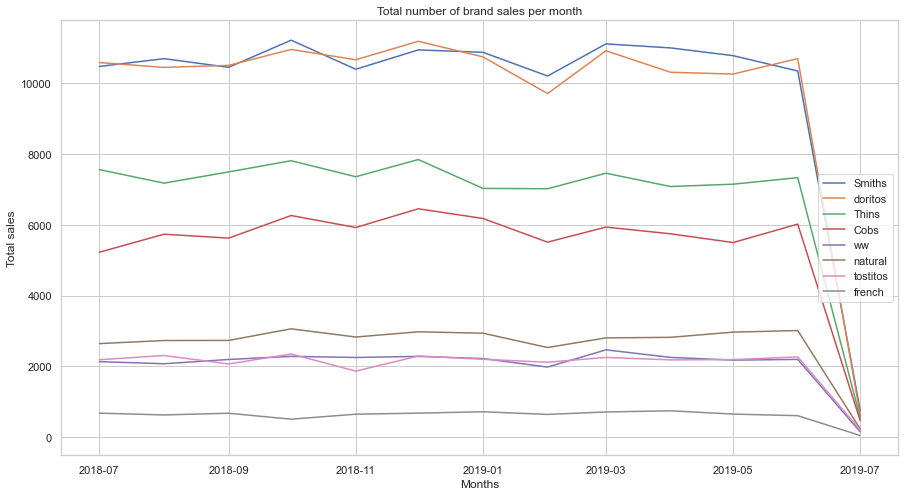

In [134]:
plt.figure(figsize=(15,8))
plt.plot(brand_group)
plt.title('Total number of brand sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Smiths','doritos','Thins','Cobs','ww','natural','tostitos','french'],loc=5)

In [135]:
chips_customers.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [136]:
#to plot stacked bars
def plot_stacked_bars_brand(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """ To plot stacked bars for the number of companies or clients who 
    have churned """

    ax= dataframe.plot(
    kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES","NEW FAMILIES","OLDER FAMILIES","OLDER SINGLES/COUPLES","RETIREES","YOUNG FAMILIES"], loc=legend_) 
                # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
    
   

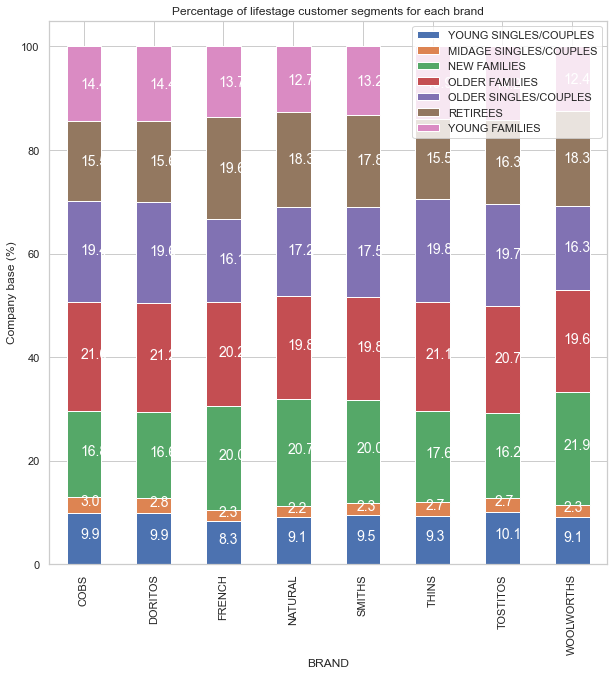

In [137]:
#to understand which customer segment prefers which brand 
lifestage_brand= chips_customers.groupby([chips_customers['BRAND'],chips_customers['LIFESTAGE']])['LYLTY_CARD_NBR'].count().unstack(level=0)
life_brand= lifestage_brand/lifestage_brand.sum() * 100
plot_stacked_bars_brand(life_brand.transpose(),'Percentage of lifestage customer segments for each brand',(10,10),rot_=90)


Across all chip brands, older families exhibit a substantial percentage, ranging from 19% to 21% of brand transactions. This consistency underscores the broad appeal of chip products to households within the older family lifestage, reflecting a significant market segment for all brands.

**Strong Representation of Older Singles and Couples**:
Following closely, older singles and couples maintain a robust presence in all brands, constituting 16% to 20% of brand transactions. This demographic demonstrates consistent engagement across chip brands, emphasizing its relevance and significance in the chip consumer landscape.

**Dwindling Presence of Young Singles and Couples**:
Notably, young singles and couples exhibit a dwindling presence across all brands, consistently constituting 9% to 10% of transactions. This observation suggests a relative decline in engagement from this lifestage segment and prompts further exploration into factors influencing this trend.



In [138]:
chips_customers.to_csv('chips_customers.csv')

In [139]:
chips_customers.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,YEAR_MONTH
count,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000
mean,1.359095e+05,135533.580448,50.651039,1.904264,6.860511,179.815140,201856.533888
std,8.025342e+04,77960.794363,32.792579,0.343675,2.256661,59.017981,47.046301
min,1.000000e+03,1.000000,1.000000,1.000000,1.900000,110.000000,201807.000000
25%,7.013000e+04,68237.250000,27.000000,2.000000,5.800000,160.000000,201810.000000
50%,1.311975e+05,135503.500000,42.000000,2.000000,6.600000,175.000000,201812.000000
75%,2.032402e+05,203284.250000,78.000000,2.000000,7.800000,175.000000,201904.000000
max,2.373711e+06,270209.000000,111.000000,5.000000,29.500000,380.000000,201907.000000


## Focusing on product selling price for each premium category 

In [140]:
chips_customers.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])[['PROD_QTY','TOT_SALES']].sum().round(2)

PROD_QTY  TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                                  
Budget           MIDAGE SINGLES/COUPLES    2794.0     9838.3
                 NEW FAMILIES              1550.0     5651.4
                 OLDER FAMILIES           12703.0    44859.2
                 OLDER SINGLES/COUPLES     9867.0    35943.0
                 RETIREES                  8153.0    30051.8
                 YOUNG FAMILIES           10462.0    37064.1
                 YOUNG SINGLES/COUPLES     4857.0    16777.1
Mainstream       MIDAGE SINGLES/COUPLES    6383.0    23950.4
                 NEW FAMILIES              1171.0     4307.1
                 OLDER FAMILIES            8015.0    28298.5
                 OLDER SINGLES/COUPLES     9868.0    35443.2
                 RETIREES                 11212.0    40592.1
                 YOUNG FAMILIES            7179.0    25319.5
                 YOUNG SINGLES/COUPLES    10459.0    40069.9
Premium          MIDAGE SINGLES/COUPLES    4338.0    15349.4
                 NEW FAMILIES               836.0     3087.3
                 OLDER FAMILIES            6105.0    21256.1
                 OLDER SINGLES/COUPLES     9517.0    34545.0
                 RETIREES                  6755.0    24804.4
                 YOUNG FAMILIES            6424.0    22781.1
                 YOUNG SINGLES/COUPLES     3353.0    11599.4

In [141]:
#to check the average price of 175 grams 
pd.set_option('display.max_rows', None)
chips_customers.groupby(['WEIGHT','BRAND'])[['PROD_QTY','TOT_SALES']].mean().round(2).dropna()

PROD_QTY  TOT_SALES
WEIGHT BRAND                          
110.0  COBS            1.92       7.28
150.0  DORITOS         1.92       7.47
160.0  WOOLWORTHS      1.89       3.59
170.0  DORITOS         1.91       8.42
       SMITHS          1.89       5.48
175.0  FRENCH          1.86       5.59
       NATURAL         1.89       5.66
       SMITHS          1.89       5.66
       THINS           1.91       6.31
       TOSTITOS        1.91       8.42
200.0  WOOLWORTHS      1.88       3.58
330.0  SMITHS          1.91      10.89
380.0  SMITHS          1.91      11.25

**110g Category Dominated by COBS**:
The 110g product weight category stands out as the exclusive domain of COBS, showcasing a strategic concentration in this specific weight range. This focused approach enables COBS to establish a distinct market presence with a unique product offering. Furthermore, 13% of the total sales is dominated by customers' preference for COBS. 

**Diverse Product Weight Range for Woolworths and Smiths**:
Woolworths and Smiths distinguish themselves by catering to a diverse range of product weights, ranging from 160g to larger packets between 200g and 380g. This versatility allows both brands to address a broad spectrum of consumer preferences, emphasizing their adaptability in the market. Smiths showcases itself as a primary competitor by selling 22.6% of the total chips sales with Woolworths at 10% of the total sales. 

**175g: Primary Focus for French Fries, Naturals, Smiths, Thins, and Tostitos**:
The 175g product weight emerges as a primary selling focus for five brands—French Fries, Naturals, Smiths, Thins, and Tostitos. This shared emphasis suggests a strategic alignment, potentially indicating a sweet spot in consumer demand for this particular weight category.

The insights derived from the groupby table empower brands to refine their product portfolios and pricing strategies. Understanding the weight-specific preferences and market concentration allows for targeted approaches that resonate with consumer demand and enhance overall competitiveness.

In [142]:
#checking the number unique loyalty numbers in chips_customers 
chips_customers.LYLTY_CARD_NBR.nunique()

43625

In [143]:
chips_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74570 entries, 0 to 74569
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              74570 non-null  datetime64[ns]
 1   STORE_NBR         74570 non-null  category      
 2   LYLTY_CARD_NBR    74570 non-null  float64       
 3   TXN_ID            74570 non-null  float64       
 4   PROD_NBR          74570 non-null  float64       
 5   PROD_QTY          74570 non-null  float64       
 6   TOT_SALES         74570 non-null  float64       
 7   PRODUCT           74570 non-null  object        
 8   WEIGHT            74570 non-null  float64       
 9   LIFESTAGE         74570 non-null  object        
 10  PREMIUM_CUSTOMER  74570 non-null  object        
 11  BRAND             74570 non-null  category      
 12  YEAR_MONTH        74570 non-null  int64         
 13  TXN_MONTH         74570 non-null  datetime64[ns]
dtypes: category(2), dateti

In [144]:
pd.reset_option('display.max_rows')  # Reset the display option to the default value

price_variations = chips_customers.groupby(['BRAND','PREMIUM_CUSTOMER'])['TOT_SALES'].unique()

In [145]:

# Display the variations
for (product, premium_category), prices in price_variations.items():
    if len(prices) > 1:
        print(f"Product: {product}, Premium Category: {premium_category}, Prices: {prices}") 

Product: COBS, Premium Category: Budget, Prices: [ 7.6  3.8 19.  15.2 11.4]
Product: COBS, Premium Category: Mainstream, Prices: [ 7.6  3.8 11.4 19.  15.2]
Product: COBS, Premium Category: Premium, Prices: [ 3.8  7.6 19.  11.4]
Product: DORITOS, Premium Category: Budget, Prices: [ 3.9  8.8  7.8  4.4 17.6 13.2 15.6 22.  11.7 19.5]
Product: DORITOS, Premium Category: Mainstream, Prices: [ 8.8  4.4  7.8 15.6 19.5  3.9 17.6 11.7 22.  13.2]
Product: DORITOS, Premium Category: Premium, Prices: [ 7.8  4.4 11.7  8.8 13.2  3.9 22.  19.5 17.6]
Product: FRENCH, Premium Category: Budget, Prices: [3. 6. 9.]
Product: FRENCH, Premium Category: Mainstream, Prices: [6. 3.]
Product: FRENCH, Premium Category: Premium, Prices: [9. 6. 3.]
Product: NATURAL, Premium Category: Budget, Prices: [ 6.  3. 12. 15.  9.]
Product: NATURAL, Premium Category: Mainstream, Prices: [ 3.  6. 15. 12.  9.]
Product: NATURAL, Premium Category: Premium, Prices: [ 6. 15.  3. 12.  9.]
Product: SMITHS, Premium Category: Budget, Pr

##  Hypothesis Test for Difference between Two Means

The null hypothesis ($H_0$) is that the true mean of type Premium is could be the same or greater than that of group Mainstream.
 * The alternative hypothesis ($H_1$) is that the the true mean of type Premium really is the less.


Text(0.5, 1.0, '')

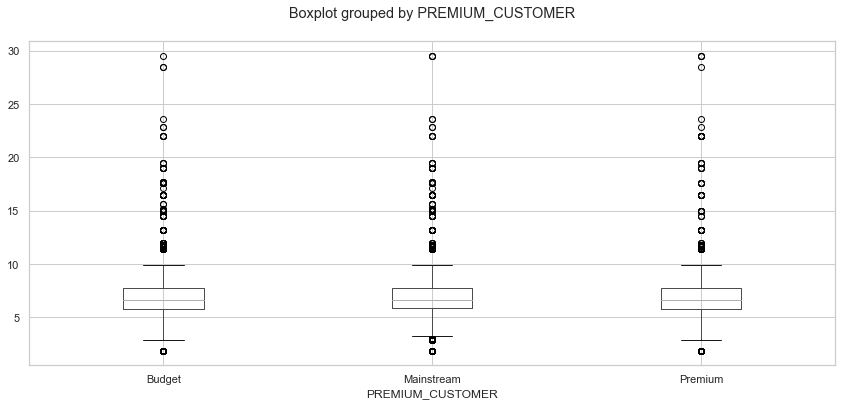

In [148]:
a = chips_customers.boxplot(column='TOT_SALES',by='PREMIUM_CUSTOMER',figsize=(14,6))
a.set_title('')

In [149]:
from scipy.stats import ttest_ind


In [157]:
resMP = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].TOT_SALES, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].TOT_SALES,equal_var=False)


In [161]:
resMB = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].TOT_SALES, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].TOT_SALES, equal_var=False )


In [166]:
xA = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].TOT_SALES
xB = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].TOT_SALES
xC = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].TOT_SALES

a_mean = xA.mean()
b_mean = xB.mean()
c_mean = xC.mean()


In [167]:
a_mean

6.937198219979279

In [168]:
print('Compare Mainstream (mean %3.2F) and Premium (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (a_mean, b_mean, resMP.pvalue / 2))

print('Compare Mainstream (mean %3.2F) and Budget (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (a_mean, c_mean, resMB.pvalue / 2))

resBP = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].TOT_SALES, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].TOT_SALES, equal_var=False )
print('Compare Premium (mean %3.2F) and Budget (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (b_mean, c_mean, resBP.pvalue / 2))

Compare Mainstream (mean 6.94) and Premium (mean 6.81): p-value for a one tail test = 0.0000
Compare Mainstream (mean 6.94) and Budget (mean 6.81): p-value for a one tail test = 0.0000
Compare Premium (mean 6.81) and Budget (mean 6.81): p-value for a one tail test = 0.4508


In [171]:
def hypo_test_single(res, alpha, var1, var2):
    if (res.pvalue / 2) < (1 - alpha):
        print('Reject the null hypothsis at %d%% significance: mean of %s greater than mean of %s' 
              % (100 * alpha, var1, var2))
    else: 
        print('Accept the null hypothsis at %d%% significance: mean of %s may not be greater than mean of %s' 
              % (100 * alpha,var1, var2))
        
hypo_test_single(resMP, 0.99, 'Mainstream', 'Premium')
hypo_test_single(resMB, 0.95, 'Mainstream', 'Budget')

Reject the null hypothsis at 99% significance: mean of Mainstream greater than mean of Premium
Reject the null hypothsis at 95% significance: mean of Mainstream greater than mean of Budget


In [172]:
chips_customers['UNIT_PRICE'] = chips_customers['TOT_SALES']/chips_customers['PROD_QTY']
chips_customers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,YEAR_MONTH,TXN_MONTH,UNIT_PRICE
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium,NATURAL,201810,2018-10-01,3.00
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01,1.45
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201808,2018-08-01,3.00
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01,5.70
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget,DORITOS,201808,2018-08-01,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201811,2018-11-01,3.80
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201905,2019-05-01,3.80
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201903,2019-03-01,3.80
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,YOUNG SINGLES/COUPLES,Premium,THINS,201811,2018-11-01,3.30


Text(0.5, 1.0, '')

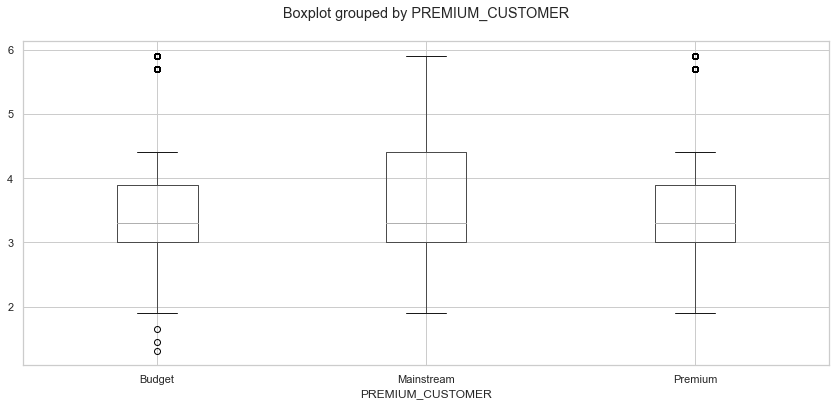

In [173]:
b = chips_customers.boxplot(column='UNIT_PRICE',by='PREMIUM_CUSTOMER',figsize=(14,6))
b.set_title('')

In [174]:
unitMP = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].UNIT_PRICE, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].UNIT_PRICE,equal_var=False)
unitMB = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].UNIT_PRICE, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].UNIT_PRICE,equal_var=False)
unitBP = ttest_ind(chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].UNIT_PRICE, chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].UNIT_PRICE,equal_var=False)


uA = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Mainstream'].UNIT_PRICE
uB = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Premium'].UNIT_PRICE
uC = chips_customers.loc[chips_customers.PREMIUM_CUSTOMER=='Budget'].UNIT_PRICE

a_mean2 = uA.mean()
b_mean2 = uB.mean()
c_mean2 = uC.mean()

In [175]:
print('Compare Mainstream (mean %3.2F) and Premium (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (a_mean2, b_mean2, unitMP.pvalue / 2))

print('Compare Mainstream (mean %3.2F) and Budget (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (a_mean2, c_mean2, unitMB.pvalue / 2))

print('Compare Premium (mean %3.2F) and Budget (mean %3.2F): p-value for a one tail test = %5.4f' % 
      (b_mean2, c_mean2, unitBP.pvalue / 2))

Compare Mainstream (mean 3.64) and Premium (mean 3.57): p-value for a one tail test = 0.0000
Compare Mainstream (mean 3.64) and Budget (mean 3.57): p-value for a one tail test = 0.0000
Compare Premium (mean 3.57) and Budget (mean 3.57): p-value for a one tail test = 0.4824


In [176]:
hypo_test_single(unitMP, 0.99, 'Mainstream', 'Premium')
hypo_test_single(unitMB, 0.95, 'Mainstream', 'Budget')

Reject the null hypothsis at 99% significance: mean of Mainstream greater than mean of Premium
Reject the null hypothsis at 95% significance: mean of Mainstream greater than mean of Budget


In [177]:
hypo_test_single(unitBP, 0.95, 'Premium', 'Budget')

Accept the null hypothsis at 95% significance: mean of Premium may not be greater than mean of Budget


The t-test results exhibit that the unit prices for the premium categories are not significantly different from each other, thus rejecting the null-hypothesis.

## Deep-dive into target customer segments preferred pack size 

### Retirees - Mainstream 

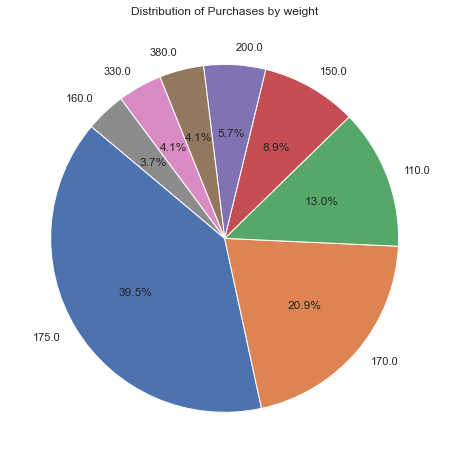

In [178]:
retirees_m = chips_customers.loc[(chips_customers['LIFESTAGE']=='RETIREES') & (chips_customers['PREMIUM_CUSTOMER']=='Mainstream')]
weight_ret = retirees_m.WEIGHT.value_counts()

brand_counts = chips_customers['BRAND'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weight_ret, labels=weight_ret.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by weight')
plt.show()

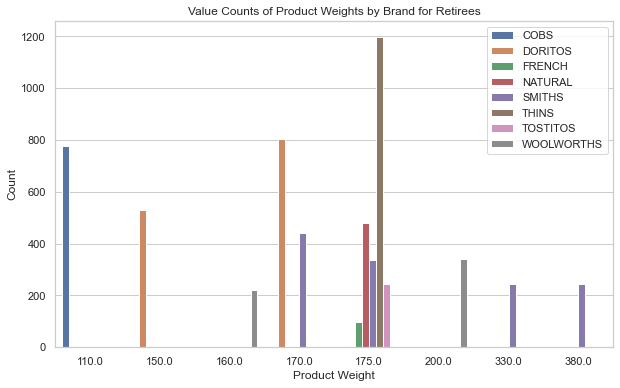

In [188]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WEIGHT', hue='BRAND', data=retirees_m)
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Product Weight')
plt.ylabel('Count')
plt.title('Value Counts of Product Weights by Brand for Retirees')

# Show the plot
plt.show()

### Older families Budget

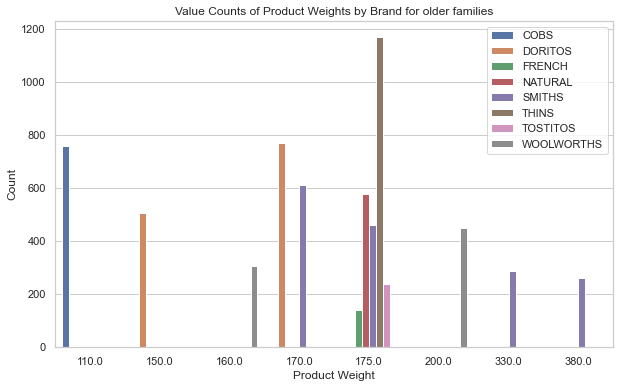

In [189]:
older_fam = chips_customers.loc[(chips_customers['LIFESTAGE']=='OLDER FAMILIES') & (chips_customers['PREMIUM_CUSTOMER']=='Budget')]
plt.figure(figsize=(10, 6))
sns.countplot(x='WEIGHT', hue='BRAND', data=older_fam)
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Product Weight')
plt.ylabel('Count')
plt.title('Value Counts of Product Weights by Brand for older families')

# Show the plot
plt.show()

### Young singles/couples Mainstream

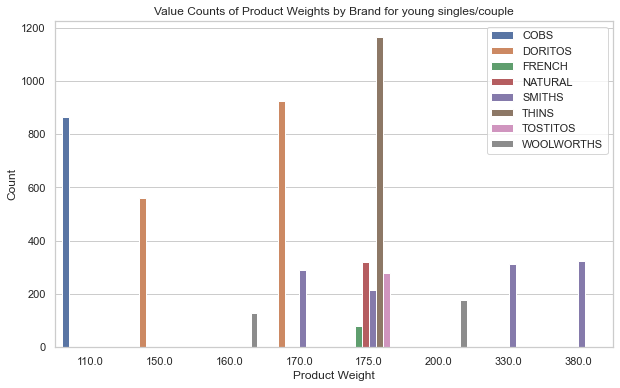

In [190]:
young_sing = chips_customers.loc[(chips_customers['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (chips_customers['PREMIUM_CUSTOMER']=='Mainstream')]
plt.figure(figsize=(10, 6))
sns.countplot(x='WEIGHT', hue='BRAND', data=young_sing)
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Product Weight')
plt.ylabel('Count')
plt.title('Value Counts of Product Weights by Brand for young singles/couple')

# Show the plot
plt.show()